<center>
<font size='7' style="color:#0D47A1">  <b>PyTorch</b></font>
</center>

<hr style= "height:3px;">
<br>

<font size='6' style="color:#00A6D6">  <b>What is PyTorch?</b></font>

It’s a Python based scientific computing package targeted at two sets of audiences:

- A replacement for NumPy to use the power of GPUs
- a deep learning research platform that provides maximum flexibility and speed

---

<br>
<font size='5' style="color:#4CAF50">  <b>A replacement for NumPy to use the power of GPUs...</b></font>

In [2]:
import torch as t

# Tensors
a = t.tensor([1,2,3])
# Can specify type during construction
a = t.tensor([1,2,3], dtype=t.half)

In [3]:
# Can cast to different types once constructed
a

tensor([ 1.,  2.,  3.], dtype=torch.float16)

In [4]:
a.double()

tensor([ 1.,  2.,  3.], dtype=torch.float64)

In [5]:
a.float()

tensor([ 1.,  2.,  3.])

In [6]:
a.short()

tensor([ 1,  2,  3], dtype=torch.int16)

In [7]:
a.long()

tensor([ 1,  2,  3])

| Data type                | dtype	                       |CPU tensor	        |GPU tensor               |
|:------------------------:|:-----------------------------:|:------------------:|:-----------------------:|
| 32-bit floating point    | torch.float32 or torch.float  | torch.FloatTensor  | torch.cuda.FloatTensor  |
| 64-bit floating point    | torch.float64 or torch.double | torch.DoubleTensor | torch.cuda.DoubleTensor |
| 16-bit floating point	   | torch.float16 or torch.half   | torch.HalfTensor   | torch.cuda.HalfTensor   |
| 8-bit integer (unsigned) | torch.uint8                   | torch.ByteTensor   | torch.cuda.ByteTensor   |
| 8-bit integer (signed)   | torch.int8	                   | torch.CharTensor   | torch.cuda.CharTensor   |
| 16-bit integer (signed)  | torch.int16 or torch.short	   | torch.ShortTensor  | torch.cuda.ShortTensor  |
| 32-bit integer (signed)  | torch.int32 or torch.int	   | torch.IntTensor    | torch.cuda.IntTensor    |
| 64-bit integer (signed)  | torch.int64 or torch.long	   | torch.LongTensor   | torch.cuda.LongTensor   |


### Converting between Tensors and Numpy Arrays...
Tensor -> Numpy

In [15]:
import numpy as np

x = t.Tensor([1,2,3.])
x.type()

'torch.FloatTensor'

In [12]:
y = x.numpy()
type(y)

numpy.ndarray

However, they point to the same place in memory...

In [13]:
x

tensor([ 1.,  2.,  3.])

In [14]:
y

array([1., 2., 3.], dtype=float32)

In [15]:
x += 10
x

tensor([ 11.,  12.,  13.])

In [16]:
y

array([11., 12., 13.], dtype=float32)

Numpy -> Tensor

In [17]:
y = np.array([5,4,3])
type(y)

numpy.ndarray

In [18]:
x = t.from_numpy(y)
type(x)

torch.Tensor

In [19]:
y

array([5, 4, 3])

In [20]:
x

tensor([ 5,  4,  3])

In [21]:
y += 10
y

array([15, 14, 13])

In [22]:
x

tensor([ 15,  14,  13])

### Speed and Efficiency
Torch is faster than Numpy

In [17]:
import time
def timer(f, trials=5):
    avg_time = 0
    for i in range(trials):
        start = time.time()
        f()
        stop = time.time()
        avg_time += (stop - start)/trials
    return avg_time

In [22]:
np_arr = np.random.rand(10000,10000)
t_arr = t.rand((10000,10000))

In [23]:
print('type(t_arr) = ', type(t_arr))
print('t_arr.shape = ', t_arr.shape)

type(t_arr) =  <class 'torch.Tensor'>
t_arr.shape =  torch.Size([10000, 10000])


In [24]:
print('type(np_arr) = ', type(np_arr))
print('np_arr.shape = ', np_arr.shape)

type(np_arr) =  <class 'numpy.ndarray'>
np_arr.shape =  (10000, 10000)


In [25]:
timer(lambda: t_arr*t_arr)

0.5525243759155274

In [26]:
timer(lambda: np_arr*np_arr)

1.276279830932617

What about optimizing with some class methods?

In [27]:
def exp1():
    y = t_arr * t_arr

In [28]:
y = t.empty(t_arr.shape)
def exp2():
    t.mul(t_arr, t_arr, out=y)

In [29]:
def exp3():
    t_arr.mul_(t_arr)

In [30]:
timer(exp1)

0.49752359390258794

In [31]:
timer(exp2)

0.17238669395446776

In [32]:
timer(exp3)

0.14784646034240723

### Tensors have 100+ built-in class methods 
including all your favorite numpy convenience methods and a a growing linear algebra library

<br>
<br>
<br>
<font size='5' style="color:#4CAF50">  <b>What about the GPU?</b></font>

There is a class method call 'to()', that sends a tensor to a specific device. This is new in 0.4.0.

In [33]:
t_arr.shape

torch.Size([10000, 10000])

In [34]:
t_arr.device # Should currently be on the cpu

device(type='cpu')

In [35]:
device = t.device('cuda')
t_arr.to(device)

RuntimeError: Error attempting to use dtype torch.float32 with layout torch.strided and device type CUDA.  Torch not compiled with CUDA enabled.


In [36]:
t.cuda.is_available()

False

<br>
<br>
<br>
<font size='5' style="color:#4CAF50">  <b>A deep learning research platform that provides maximum flexibility and speed</b></font>

Central to all neural networks in PyTorch is the autograd package. Let’s first briefly visit this, and we will then go to training our first neural network.

The autograd package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

In [76]:
b = t.tensor([2], dtype=t.float32)

In [77]:
b.requires_grad

False

In [78]:
y=b*b*b
y.requires_grad

False

In [79]:
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [95]:
b.requires_grad = True # or b.requires_grad_()

In [101]:
y=b*b*b
y.requires_grad

True

In [102]:
z = y*y

In [103]:
z.backward()

In [107]:
y.grad_fn

In [108]:
b.grad

tensor([ 71926.9922])

In [109]:
z.grad

In [70]:
c = b.detach()

In [71]:
y=c*c

In [72]:
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [110]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


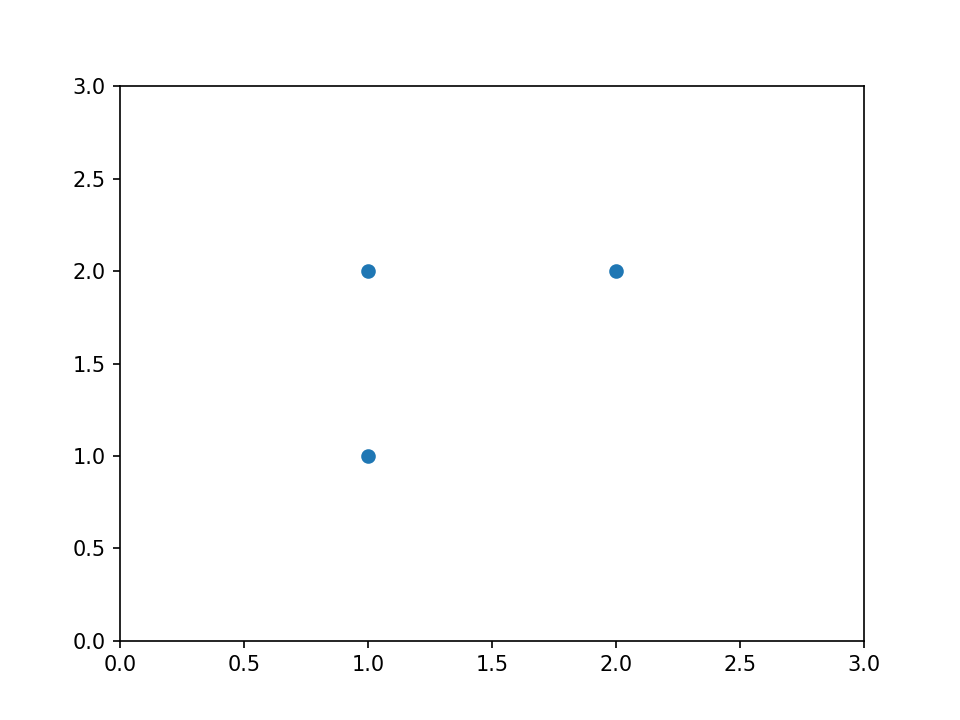

In [132]:
pts = t.tensor([(1,1),(1,2),(2,2)]).float()
plt.scatter(pts[:,0],pts[:,1]); plt.xlim(0,3); plt.ylim(0,3); plt.show()

In [146]:
params = t.tensor((1,0), requires_grad=True, dtype=t.float32)

In [148]:
diff = params[0]*pts[:,0]+params[1]-pts[:,1]
sq = (diff*diff).float()
loss = sq.mean()
loss.backward()
print(params.requires_grad)
params = params - 0.001*params.grad

True


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'